In [3]:
import pandas as pd
import pickle5 as pickle55

import os

from phenopy.build_hpo import generate_annotated_hpo_network
from phenopy.score import Scorer

import matplotlib.pyplot as plt
import statistics

import networkx as nx
from pyvis.network import Network


2022-01-23 09:09:14,361 - phenopy - INFO - checking if config file exists: /home/sasja/.phenopy
2022-01-23 09:09:14,362 - phenopy - INFO - phenopy 0.5.3
2022-01-23 09:09:14,363 - phenopy - INFO - Using configuration file: /home/sasja/.phenopy/phenopy.ini


In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

file = './data_all.pickle'  
with open(file, "rb") as fh:
      g = pickle55.load(fh)
        
g.head()

,hpo_all,hpo_all_name,graphs,hpo_all_with_parents,hpo_all_name_with_parents,label
0,"[HP:0006579, HP:0001276, HP:0100025, HP:000987...","[Prolonged neonatal jaundice, Hypertonia, Over...","(All, Phenotypic abnormality, Abnormality of h...","[HP:0000001, HP:0000118, HP:0000152, HP:000015...","[All, Phenotypic abnormality, Abnormality of h...",spop_1
1,"[HP:0006579, HP:0002643, HP:0100716, HP:000255...","[Prolonged neonatal jaundice, Neonatal respira...","(All, Functional abnormality of the bladder, A...","[HP:0000001, HP:0000009, HP:0000014, HP:000006...","[All, Functional abnormality of the bladder, A...",spop_1
2,"[HP:0001561, HP:0001623, HP:0002015, HP:000887...","[Polyhydramnios, Breech presentation, Dysphagi...","(All, Abnormality of body height, Tall stature...","[HP:0000001, HP:0000002, HP:0000098, HP:000011...","[All, Abnormality of body height, Tall stature...",spop_2
3,"[HP:0001662, HP:0001873, HP:0002105, HP:000125...","[Bradycardia, Thrombocytopenia, Hemoptysis, Se...","(All, Abnormality of body height, Abnormality ...","[HP:0000001, HP:0000002, HP:0000078, HP:000008...","[All, Abnormality of body height, Abnormality ...",spop_2
4,"[HP:0001250, HP:0000717, HP:0000411, HP:000031...","[Seizure, Autism, Protruding ear, Hyperteloris...","(All, Phenotypic abnormality, Abnormality of h...","[HP:0000001, HP:0000118, HP:0000152, HP:000023...","[All, Phenotypic abnormality, Abnormality of h...",spop_2


In [11]:
omim_genes = {
    'OMIM:148050' : 'ankrd',
    'OMIM:300958' : 'dd3x3',
    'OMIM:610443' : 'kansl1',
    'OMIM:611867' : '22q11',
    'OMIM:614104' : 'dyrk1a',
    'OMIM:615009' : 'pacs1',
    'OMIM:615873' : 'andp',
    'OMIM:616158' : 'pura',
    'OMIM:616708' : 'wac',
    'OMIM:617140' : 'son',
    'OMIM:616846' : 'kdm3b', 
    'OMIM:618829' : 'spop2',
    'OMIM:618828' : 'spop1',
    'OMIM:617854' : 'cltc',
    'OMIM:617557' : 'yy1',
    'OMIM:617450' : 'ppm1d'
}

diseases = list(omim_genes.keys())

In [19]:
diagnoses_database = {}
for index in range(len(g['hpo_all'])):
    separator = ', '
    a = (separator.join(g['hpo_all'][index])) 

    result = utils.query_phenomizer('scout', 'scout123',  a)
    # print(result.text)
    diagnoses_omim = []
    for i in range(50):
        omim = result.text.split('\n')[6:][i].split('\t')[2]
        diagnoses_omim.append(omim)

    diagnoses_database[index] = diagnoses_omim
    #         print(result.text.split('\n')[6:][i].split('\t')[2]) #OMIM
    #         print(result.text.split('\n')[6:][i].split('\t')[4]) #GENE

In [20]:
for i in diagnoses_database.keys():
    diagnoses = diagnoses_database[i]
    for j in diagnoses:
        if j in diseases:
            print('jippie!', i, j)

jippie! 12 OMIM:610443
jippie! 38 OMIM:615009
jippie! 57 OMIM:610443
jippie! 60 OMIM:610443
jippie! 67 OMIM:614104
jippie! 72 OMIM:300958
jippie! 77 OMIM:610443
jippie! 78 OMIM:610443
jippie! 82 OMIM:610443
jippie! 83 OMIM:610443
jippie! 84 OMIM:610443
jippie! 86 OMIM:610443
jippie! 89 OMIM:610443
jippie! 90 OMIM:610443
jippie! 91 OMIM:610443
jippie! 94 OMIM:610443
jippie! 95 OMIM:610443
jippie! 96 OMIM:610443
jippie! 97 OMIM:610443
jippie! 98 OMIM:610443
jippie! 99 OMIM:610443
jippie! 100 OMIM:610443
jippie! 101 OMIM:610443
jippie! 102 OMIM:610443
jippie! 103 OMIM:610443
jippie! 104 OMIM:610443
jippie! 105 OMIM:610443
jippie! 106 OMIM:610443
jippie! 108 OMIM:615009
jippie! 111 OMIM:615009
jippie! 114 OMIM:615009
jippie! 115 OMIM:615873
jippie! 116 OMIM:615873
jippie! 119 OMIM:615009
jippie! 120 OMIM:615009
jippie! 123 OMIM:615873
jippie! 127 OMIM:615873
jippie! 128 OMIM:615873
jippie! 137 OMIM:615873
jippie! 140 OMIM:615873
jippie! 142 OMIM:615873
jippie! 143 OMIM:615873
jippie! 145 O

In [5]:
phenopy_data_directory = os.path.join(os.getenv('HOME'), '.phenopy/data')
obo_file = os.path.join(phenopy_data_directory, 'hp.obo')
disease_to_phenotype_file = os.path.join(phenopy_data_directory, 'phenotype.hpoa')
syndrome_profile_directory = os.fsencode('./syndromes')

In [6]:
class Graph:
    def __init__(self, graphs):
        self.graphs = graphs

    def plot_graph(self, index):
        net = Network(height='1000 px', width='1000 px', bgcolor='##34ebc3', font_color='red', notebook=True,
                      directed=True)
        net.barnes_hut()
        net.show_buttons(filter_=['physics'])
        net.from_nx(self.graphs.values[index])
        return net.show('graph_of_patient.html')

In [7]:
class Update_HPO:
    
    def __init__(self, obo_file):
        self.obo_file = obo_file
        self.replacement_dict = self.create_dictionary_replacements()
        self.non_phenotype_nodes = self.find_non_phenotype_nodes()
   
    def find_non_phenotype_nodes(self):
        non_phenotype_nodes = set(['HP:0000005', 'HP:0012823', 'HP:0040279'])
        
        nodes_added = len(non_phenotype_nodes)
        while nodes_added > 0:

            hpobo = open(self.obo_file)
            nodes_added = 0
            term = ''

            for line in hpobo:
                if line.startswith('id'):
                    term = line.split(': ')[1].split('\n')[0]

                elif line.startswith('is_a'):
                    hpo_term = line.split(': ')[1].split(' !')[0]
                    if hpo_term in non_phenotype_nodes and term not in non_phenotype_nodes:
                        non_phenotype_nodes.add(term)
                        nodes_added += 1
        return non_phenotype_nodes


    def create_dictionary_replacements(self):
        hpobo = open(self.obo_file)
        replacements = {} #key is replaced by value

        term = ''

        for line in hpobo:
            if line.startswith('id'):
                term = line.split(': ')[1].split('\n')[0]

            elif line.startswith('replaced_by'):
                hpo_term = line.split(': ')[1].split('\n')[0]
                replacements[term] = hpo_term

            elif line.startswith('alt_id'):
                hpo_term = line.split(': ')[1].split('\n')[0]
                replacements[hpo_term] = term
        return replacements

    
    def create_dictionary_id_name(self): #gebruik ik helemaal niet
        hpobo = open(self.obo_file)
        id_to_name = {}

        term_id = ''

        for line in hpobo:
            if line.startswith('id'):
                term_id = line.split(': ')[1].split('\n')[0]

            elif line.startswith('name'):
                term_name = line.split(': ')[1].split('\n')[0]
                id_to_name[term_id] = term_name

        return id_to_name
    
    def replace(self, term):
        if term in self.replacement_dict.keys():
            return self.replacement_dict[term]
        else:
            return term

    
    def delete_non_phenotype_nodes(self, term_list):
        new_term_list = [i for i in term_list if i not in self.non_phenotype_nodes]
        return new_term_list


    def update_phenotype(self, patient):
        replaced = [self.replace(term) for term in patient]
        replaced_deleted = self.delete_non_phenotype_nodes(replaced)
        return replaced_deleted

In [8]:
updater = Update_HPO(obo_file)
for index in range(len(g['hpo_all'])):
    g['hpo_all'][index] = updater.update_phenotype(g['hpo_all'][index])
    g['hpo_all_with_parents'][index] = updater.update_phenotype(g['hpo_all_with_parents'][index])
    g['label'][index] = g['label'][index].replace("_", "")

In [9]:
class Printer:
    
    def data_general(self, data, syndromes_dict, lengths_hpo_names):
        print('SYNDROMES')
        print('\n- amount of patients:', len(data['hpo_all']))
        print('\n- amount of syndromes:', len(data['label'].unique()))
        print('\n- syndromes: ')
        [print(x[0],':', x[1], 'patients') for x in syndromes_dict]
        
        plt.hist(data['label'])
        plt.xlabel('Syndrome')
        plt.ylabel('Frequency')
        plt.title('Distribution of syndromes in data')
        plt.rcParams["figure.figsize"] = (10,3)
        plt.show()

        print('\n\nHPO TERMS')
        
        self.general_info('amount of hpo terms per patient', lengths_hpo_names)
        self.plot_histogram(lengths_hpo_names, 'Amount of terms assigned to patients', 'Amount of HPO terms for one patient', 100)
     
    
    def resnik_scores_same(self, resnik_scores_same):
        self.plot_histogram(resnik_scores_same, 'Resnik scores of patients compared to themselves', 'Resnik score')
        self.general_info('resnik score', resnik_scores_same)
        
        
    def length_profiles(self, length_profiles):
        self.plot_histogram(length_profiles, 'Amount of terms associated with syndromes', 'Amount of terms', 50)    
        self.general_info('length profile', length_profiles)
    
    
    def general_info(self, name, data):
        print('average', name, ':', statistics.mean(data))
        print('median', name, ':', statistics.median(data))
        print('mode', name, ':', statistics.mode(data))
        print('maximum', name, ':', max(data))
        print('minimum', name, ':', min(data))
        
        
    def plot_histogram(self, data, title, xlabel, bins=None):
        plt.hist(data, bins = bins)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel('Frequency')
        plt.show()
        
        
    def plot_confusion_matrix(self, confusion_matrix, labels, title):
        plt.figure(figsize=(15,15))
        p = sn.heatmap(confusion_matrix, annot=True, cmap="Blues", annot_kws={"size": 10}, fmt='.3f')
        p.set_yticklabels(list(labels), fontsize = 15, rotation = 45)
        p.set_xticklabels(list(labels), fontsize = 15, rotation = 45)
        plt.title(title, fontsize=17)
        plt.xlabel("Predicted labels")
        plt.ylabel("True labels")
        plt.show()

In [108]:
printer = Printer()
graphs = Graph(g['graphs'])

In [78]:
g['hpo_all'][289]

['HP:0000717', 'HP:0000750', 'HP:0001249', 'HP:0001256']

In [109]:
graphs.plot_graph(289)

In [72]:
phenopy_data_directory = os.path.join(os.getenv('HOME'), '.phenopy/data')
obo_file = os.path.join(phenopy_data_directory, 'hp.obo')
disease_to_phenotype_file = os.path.join(phenopy_data_directory, 'phenotype.hpoa')

hpo_network, alt2prim, disease_records = generate_annotated_hpo_network(obo_file, disease_to_phenotype_file)
scorer = Scorer(hpo_network, scoring_method = 'Resnik')

SYNDROMES

- amount of patients: 553

- amount of syndromes: 16

- syndromes: 
spop1 : 2 patients
spop2 : 5 patients
kdm3b : 13 patients
yy1 : 14 patients
cltc : 14 patients
ppm1d : 15 patients
dyrk1a : 15 patients
pacs1 : 19 patients
22q11 : 24 patients
wac : 25 patients
ddx3x : 30 patients
ankrd : 40 patients
son : 53 patients
pura : 57 patients
adnp : 81 patients
kansl1 : 146 patients


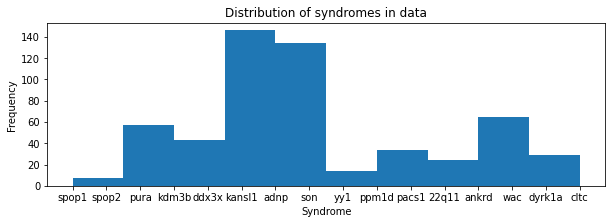



HPO TERMS
average amount of hpo terms per patient : 20.151898734177216
median amount of hpo terms per patient : 19
mode amount of hpo terms per patient : 17
maximum amount of hpo terms per patient : 79
minimum amount of hpo terms per patient : 4


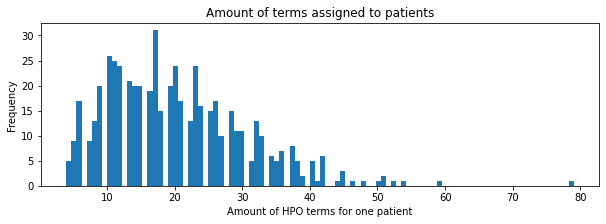

In [82]:
syndromes = {}
for i in g['label']:
    if i in syndromes:
        syndromes[i] += 1
    else: 
        syndromes[i] = 1
        
syndrome_names = list(syndromes.keys())
syndromes = sorted(syndromes.items(), key=lambda kv: kv[1])

lengths_hpo_names = [len(hpo_names[x]) for x in range(len(hpo_names))]


printer.data_general(g, syndromes, lengths_hpo_names)

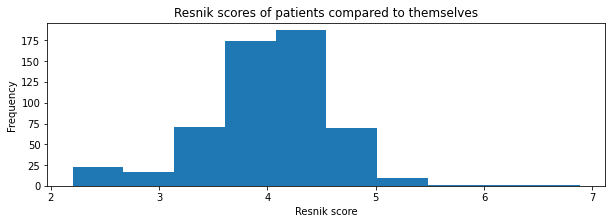

average resnik score : 4.010584335487351
median resnik score : 4.0566344209818075
mode resnik score : 4.4145634820925945
maximum resnik score : 6.885089816155426
minimum resnik score : 2.201917092571384


In [83]:
resnik_scores_same = []
amount_of_hpo_terms = []

for patient in g['hpo_all']:
    score_patient = scorer.score_term_sets_basic(patient, patient)
    resnik_scores_same.append(score_patient)
    amount_of_hpo_terms.append(len(patient))
    
printer.resnik_scores_same(resnik_scores_same)

In [75]:
syndromes_profiles = {}
for file in os.listdir(os.fsencode('./syndromes')):
    terms = []

    filename = os.fsdecode(file)
    syndrome = filename.split('_')[-1].split('.')[0]
    terms = list(pd.read_excel('./syndromes/'+filename)['HPO_TERM_ID'])

    final_terms = updater.update_phenotype(terms)    
    syndromes_profiles[syndrome] = final_terms

/home/sasja/.local/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


length syndromes profiles
pacs1 : 41
22q11 : 14
ankrd : 31
kdm3b : 33
cltc : 16
son : 82
spop2 : 43
pura : 19
ppm1d : 27
ddx3x : 27
wac : 37
yy1 : 25
adnp : 41
dyrk1a : 37
kansl1 : 79
spop1 : 37


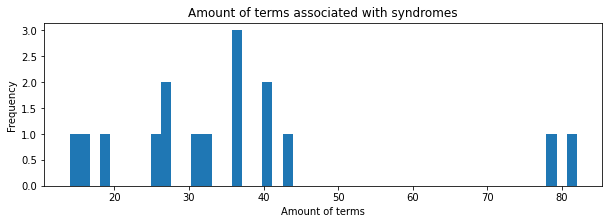

average length profile : 36.8125
median length profile : 35.0
mode length profile : 37
maximum length profile : 82
minimum length profile : 14


In [76]:
print('length syndromes profiles')
for key in syndromes_profiles:
    print(key, ':', len(syndromes_profiles[key]))

length_profiles = [len(i) for i in syndromes_profiles.values()]
    
printer.length_profiles(length_profiles)